# Project Introduction
1. This project tries to use `unsupervised machine learning techniques` to separate customers of this bank into different customer clusters. This clustering may make it eaiser for the bank to introduce different services for different customer groups.

2. My goal is to see how the unsupervised learning will work.

In [1]:
import numpy as np
import tqdm
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
import pandas as pd
import csv
labels = None
with open("./credit_card/archive/CC GENERAL.csv", 'r') as file:
        fea_name = list(csv.reader(file, delimiter=','))[0]
        
datasets = pd.read_csv("./credit_card/archive/CC GENERAL.csv", delimiter=',',header=0)

## Data Preprocessing

In [2]:
def normalization(ds):
    """
    Normalization Function
    """
    ds = shuffle(ds, random_state=42)
    mean = np.mean(ds, axis=0)
    std = np.std(ds, axis=0)
    normalized_ds = (ds - mean) / (std+1e-5)
    return normalized_ds, mean, std

In [3]:
fea_name # print all the feature names of the dataset

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

Here I subjectively chose some features that may separate customers.

In [4]:
chosen_fea = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','PURCHASES_FREQUENCY', 'CASH_ADVANCE','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX', 'PAYMENTS','TENURE']
used_datasets = datasets[chosen_fea]
used_datasets = used_datasets.fillna(0) # fill the NA data with zero
used_datasets[:10]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,TENURE
0,40.900749,0.818182,95.40,0.166667,0.000000,0.000000,0,2,201.802084,12
1,3202.467416,0.909091,0.00,0.000000,6442.945483,0.250000,4,0,4103.032597,12
2,2495.148862,1.000000,773.17,1.000000,0.000000,0.000000,0,12,622.066742,12
3,1666.670542,0.636364,1499.00,0.083333,205.788017,0.083333,1,1,0.000000,12
4,817.714335,1.000000,16.00,0.083333,0.000000,0.000000,0,1,678.334763,12
5,1809.828751,1.000000,1333.28,0.666667,0.000000,0.000000,0,8,1400.057770,12
6,627.260806,1.000000,7091.01,1.000000,0.000000,0.000000,0,64,6354.314328,12
7,1823.652743,1.000000,436.20,1.000000,0.000000,0.000000,0,12,679.065082,12
8,1014.926473,1.000000,861.49,0.333333,0.000000,0.000000,0,5,688.278568,12
9,152.225975,0.545455,1281.60,0.166667,0.000000,0.000000,0,3,1164.770591,12


In [5]:
# Unify the type of all the data
np_datasets = used_datasets.to_numpy().astype(np.float32)
np_datasets[:3]

array([[4.0900749e+01, 8.1818199e-01, 9.5400002e+01, 1.6666700e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.0000000e+00,
        2.0180208e+02, 1.2000000e+01],
       [3.2024675e+03, 9.0909100e-01, 0.0000000e+00, 0.0000000e+00,
        6.4429453e+03, 2.5000000e-01, 4.0000000e+00, 0.0000000e+00,
        4.1030327e+03, 1.2000000e+01],
       [2.4951489e+03, 1.0000000e+00, 7.7316998e+02, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.2000000e+01,
        6.2206677e+02, 1.2000000e+01]], dtype=float32)

In [6]:
# Normalize the dataset
norm_ds, mean, std = normalization(np_datasets)
mean, std

(array([1.5644758e+03, 8.7727171e-01, 1.0032042e+03, 4.9034950e-01,
        9.7887018e+02, 1.3514408e-01, 3.2488267e+00, 1.4709832e+01,
        1.7331425e+03, 1.1517319e+01], dtype=float32),
 array([2.0814143e+03, 2.3689872e-01, 2.1365020e+03, 4.0135309e-01,
        2.0970686e+03, 2.0010620e-01, 6.8244481e+00, 2.4856575e+01,
        2.8949001e+03, 1.3383101e+00], dtype=float32))

In [7]:
np.mean(norm_ds, axis=0)

array([-4.8421617e-07, -4.4000617e-06,  2.4130890e-07,  2.6246623e-06,
        3.2498184e-07,  3.1922784e-07, -5.6180875e-07, -5.1317436e-08,
        4.7486921e-07, -2.6710873e-07], dtype=float32)

In [8]:
np.std(norm_ds, axis=0)

array([1.0000002 , 0.99995226, 1.0000201 , 0.99995613, 0.9999688 ,
       0.99996984, 0.99996316, 0.9999812 , 1.0000002 , 0.9999142 ],
      dtype=float32)

Here we can see the final shape of the data with 8950 instances and 10 features

In [9]:
norm_ds.shape

(8950, 10)

## Kmeans

Use Kmeans to cluster the data. Here to find the best cluster value, I chose to iterate values from 100 to 1000 with a step 50.

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

clusters = range(100, 1000, 50)

sil_scores = []
cali_scores = []
davies_scores = []
models = []
bar = tqdm.tqdm(range(100, 1000, 50))
bar.set_description("Iterating clusters: ")
for cluster in clusters:
    model = KMeans(n_clusters=cluster, random_state=42).fit(norm_ds)
    sil_scores.append(silhouette_score(norm_ds, model.labels_))
    cali_scores.append(calinski_harabasz_score(norm_ds, model.labels_))
    davies_scores.append(davies_bouldin_score(norm_ds, model.labels_))
    models.append(model)
    bar.update(1)
bar.close()

Iterating clusters: : 100%|████████████████████████████████████████████████████████████| 18/18 [06:28<00:00, 31.79s/it]

ValueError: need more than 1 value to unpack

In [15]:
temp_table = np.array([clusters, sil_scores, cali_scores, davies_scores])
temp_table = temp_table.T
temp_table.shape

(18, 4)

In [16]:
score_table = pd.DataFrame(data=temp_table, columns=["cluster", "silhouettte", "calinski_harabasz", "davies_bouldin"])
score_table

,cluster,silhouettte,calinski_harabasz,davies_bouldin
0,100.0,0.196712,734.055081,1.257594
1,150.0,0.197443,613.345565,1.237397
2,200.0,0.197485,542.719928,1.244578
3,250.0,0.190850,493.853339,1.210619
4,300.0,0.189780,457.686023,1.206566
5,350.0,0.191097,429.599187,1.178874
6,400.0,0.197230,412.344307,1.144731
7,450.0,0.197746,393.705581,1.113695
8,500.0,0.198641,381.359341,1.091514
9,550.0,0.193407,370.086032,1.075915


In [17]:
# store the score table
score_table.to_csv("./scores_some_feas_100_1000_50.csv", decimal=',', index=False)

Text(0.5, 1.0, 'silhouettte score')

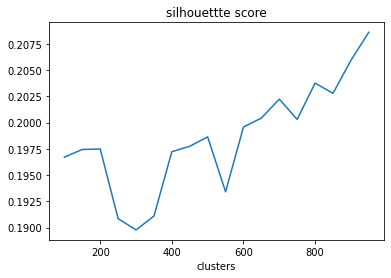

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(clusters, sil_scores)
plt.xlabel("clusters")
plt.title("silhouettte score")

Text(0.5, 1.0, 'calinski_harabasz score')

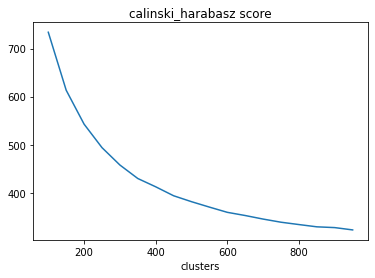

In [19]:
plt.plot(clusters, cali_scores)
plt.xlabel("clusters")
plt.title("calinski_harabasz score")

Text(0.5, 1.0, 'davies_bouldin score')

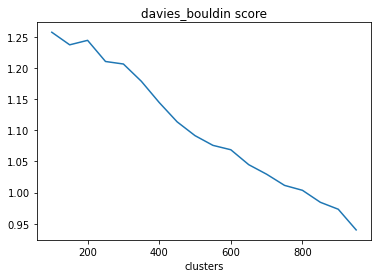

In [20]:
plt.plot(clusters, davies_scores)
plt.xlabel("clusters")
plt.title("davies_bouldin score")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
score_table_K = pd.read_csv("./scores_some_feas_100_1000_50.csv", decimal=",", header=0)

In [27]:
score_table_K["cluster"]

0     100.0
1     150.0
2     200.0
3     250.0
4     300.0
5     350.0
6     400.0
7     450.0
8     500.0
9     550.0
10    600.0
11    650.0
12    700.0
13    750.0
14    800.0
15    850.0
16    900.0
17    950.0
Name: cluster, dtype: float64

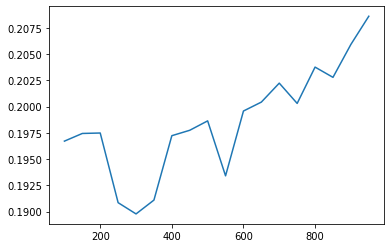

In [28]:
plt.plot(score_table_K["cluster"], score_table_K["silhouettte"])

In [14]:
from pandas import DataFrame

In [57]:
def plot_threescores(score_table: DataFrame, title: str, save_path: str, index_name: str):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    fig.suptitle(title)
    
    axes[0].plot(score_table[index_name].to_numpy(), score_table["silhouettte"])
    axes[0].set_xlabel(index_name)
    axes[0].set_ylabel("silhouettte")
    
    axes[1].plot(score_table[index_name], score_table["calinski_harabasz"])
    axes[1].set_xlabel(index_name)
    axes[1].set_ylabel("calinski_harabasz")
    
    axes[2].plot(score_table[index_name], score_table["davies_bouldin"])
    axes[2].set_xlabel(index_name)
    axes[2].set_ylabel("davies_bouldin")
    
    plt.show()
    fig.savefig(save_path + title.replace(" ", "_") + ".jpg", dpi=800)

In [44]:
"sdfs".replace("s", "f")

'fdff'

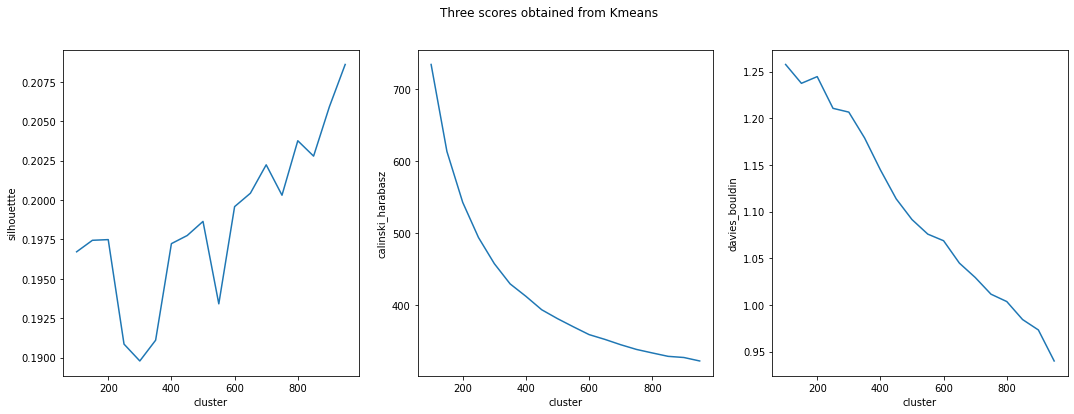

In [52]:
plot_threescores(score_table_K, "Three scores obtained from Kmeans", "./", "cluster")

In [40]:
score_table_GM = pd.read_csv("./scores_some_feas_100_1000_50_GM.csv", decimal=",", header=0)

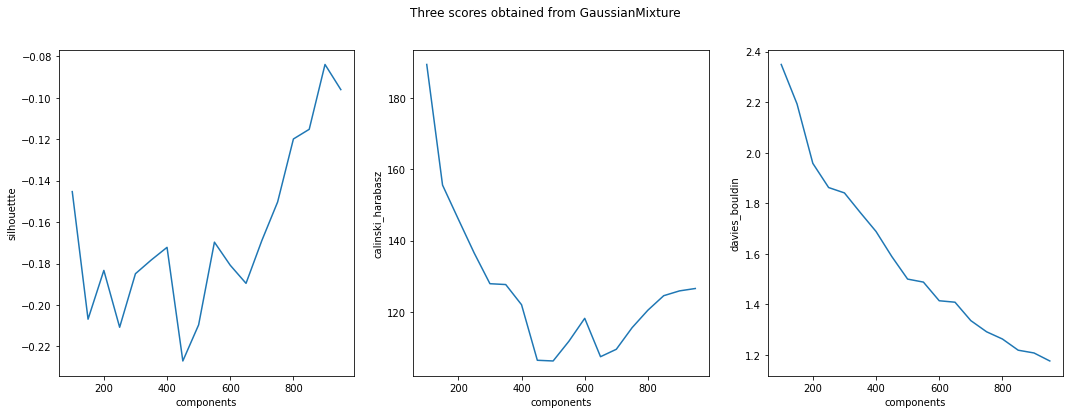

In [58]:
plot_threescores(score_table_GM, "Three scores obtained from GaussianMixture", "./", "components")

### Analyse the Kmeans result
Here we use `cluster=900` for the following analysis by considering three scores shown above

In [21]:
model_900 = models[(900 - 100) // 50]
print(len(model_900.cluster_centers_))

900


In [29]:
# restore the dataset
origin_ds = norm_ds * std + mean
origin_ds.shape

(8950, 10)

Here I iterate all the labels and caculate their mean and std values

In [38]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tqdm
import numpy as np
def visualize_mean_std(model, label_num, target_index, target_name, model_type="Kmeans"):
    """
    label_num: number of labels
    target_index: target feature'index
    target_name: target feature name
    """
    labels = range(label_num)
    used_means = []
    used_std = []
    bar = tqdm.tqdm(labels)
    bar.set_description("Iterating the labels")
    if model_type == "Kmeans":
        predicted_labels = model.labels_
    elif model_type == "GaussianMixture":
        predicted_labels = model.predict(norm_ds)
    for label in labels:
        if model_type == "Kmeans":
            subset = origin_ds[predicted_labels== label]
        elif model_type == "GaussianMixture":
            subset = origin_ds[predicted_labels == label]
        used_means.append(np.mean(subset[:, target_index]))
        used_std.append(np.std(subset[:, target_index]))
        bar.update(1)
        
    bar.close()
    
    array_means = np.array(used_means)
    array_stds = np.array(used_std)

    color = cm.viridis(0.7)
    f, ax = plt.subplots(1,1)
    ax.plot(labels, array_means, color=color)
    ax.set_xlabel("group")
    f.suptitle(f"means and std of {target_name} for each group")
    r1 = array_means + array_stds
    r2 = array_stds - array_stds
    ax.fill_between(labels, list(r1), list(r2), color=color, alpha=0.2)

Visualize for the balance

Iterating the labels: 100%|████████████████████████████████████████████████████████| 900/900 [00:00<00:00, 9892.87it/s]


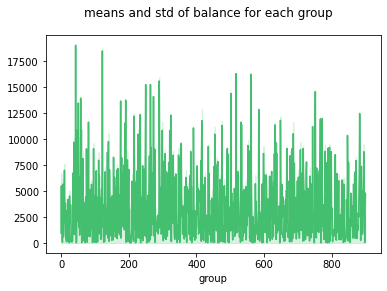

In [30]:
visualize_mean_std(model_900, 900, 0, "balance")

Visualize for the purchases

Iterating the labels: 100%|████████████████████████████████████████████████████████| 900/900 [00:00<00:00, 9691.21it/s]


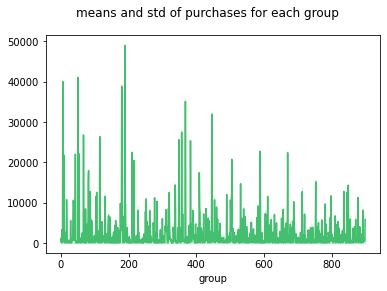

In [31]:
visualize_mean_std(model_900, 900, 2, "purchases")

## Gaussian Mixture
Gaussian Mixture is also a commonly used clustering technique

In [12]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

Repeat the same process as Kmeans

In [15]:
components = range(100, 1000, 50)

sil_scores_GM = []
cali_scores_GM = []
davies_scores_GM = []
models_GM = []
bar = tqdm.tqdm(range(100, 1000, 50))
bar.set_description("Iterating components: ")
for component in components:
    model = GaussianMixture(n_components=component, random_state=42).fit(norm_ds)
    labels = model.predict(norm_ds)
    # -1 means treated as a outlier
    chosen_labels = (labels != -1) 
    sil_scores_GM.append(silhouette_score(norm_ds[chosen_labels], labels[chosen_labels]))
    cali_scores_GM.append(calinski_harabasz_score(norm_ds[chosen_labels], labels[chosen_labels]))
    davies_scores_GM.append(davies_bouldin_score(norm_ds[chosen_labels], labels[chosen_labels]))
    models_GM.append(model)
    bar.update(1)
bar.close()

Iterating components: : 100%|█████████████████████████████████████████████████████████| 18/18 [31:32<00:00, 105.13s/it]


In [16]:
temp_table = np.array([components, sil_scores_GM, cali_scores_GM, davies_scores_GM])
temp_table = temp_table.T
temp_table.shape

(18, 4)

In [17]:
score_table = pd.DataFrame(data=temp_table, columns=["components", "silhouettte", "calinski_harabasz", "davies_bouldin"])
score_table

,components,silhouettte,calinski_harabasz,davies_bouldin
0,100.0,-0.145287,189.454438,2.349389
1,150.0,-0.206880,155.587137,2.193188
2,200.0,-0.183331,146.007399,1.957965
3,250.0,-0.210780,136.544190,1.862290
4,300.0,-0.184927,127.897716,1.841048
5,350.0,-0.178305,127.660912,1.763638
6,400.0,-0.172194,122.001758,1.688487
7,450.0,-0.227052,106.399375,1.589163
8,500.0,-0.209609,106.203152,1.499954
9,550.0,-0.169692,111.745651,1.488081


In [18]:
# store the score table
score_table.to_csv("./scores_some_feas_100_1000_50_GM.csv", decimal=',', index=False)

Text(0.5, 1.0, 'silhouettte score')

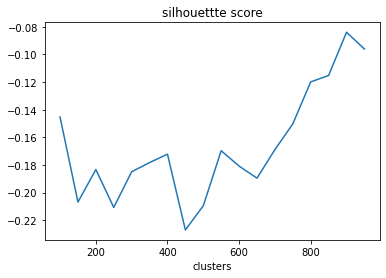

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(components, sil_scores_GM)
plt.xlabel("clusters")
plt.title("silhouettte score")

Text(0.5, 1.0, 'calinski_harabasz score')

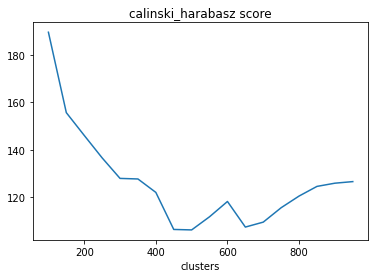

In [22]:
plt.plot(components, cali_scores_GM)
plt.xlabel("clusters")
plt.title("calinski_harabasz score")

Text(0.5, 1.0, 'davies_bouldin score')

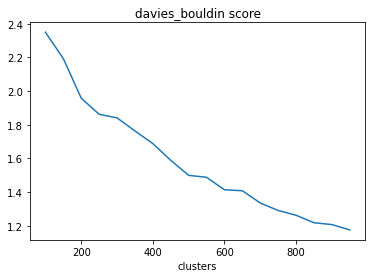

In [23]:
plt.plot(components, davies_scores_GM)
plt.xlabel("clusters")
plt.title("davies_bouldin score")

In [25]:
model_450_GM = models_GM[(450 - 100) // 50]

Iterating the labels: 100%|█████████████████████████████████████████████████████████| 450/450 [00:00<00:00, 707.36it/s]


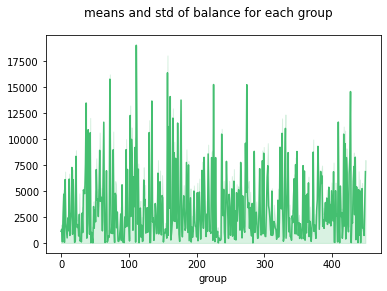

In [39]:
visualize_mean_std(model_450_GM, 450, 0, "balance", "GaussianMixture")

Iterating the labels:   0%|                                                                    | 0/450 [06:47<?, ?it/s]


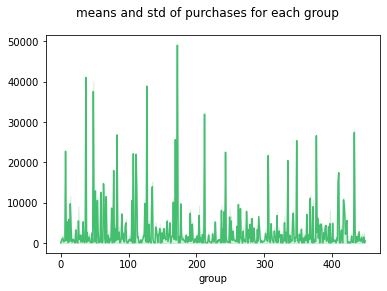

In [40]:
visualize_mean_std(model_450_GM, 450, 2, "purchases", "GaussianMixture")